# Spectral Clustering

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.metrics.pairwise import euclidean_distances
from numpy.linalg import inv, eig
from matplotlib.pyplot import cm 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
np.random.seed(42)

In [92]:
import scipy.io
mat = scipy.io.loadmat('data.mat')
X = mat['X']

## Exercise 2

### a)

In [68]:
def farthest_first_init(X,k):
    n = len(X)
    d = (k,) + X.shape[1:]
    
    D = euclidean_distances(X)
    S = np.zeros(d)
    S_indices = []
    random_pick = np.random.choice(n,1)
    S[0]= X[random_pick]
    S_indices.append(random_pick)
    
    for i in range(1,k):
        D_x = np.amin(D[:,S_indices],axis = 1)
        next_center_index = np.argmax(D_x, axis = 0)
        S[i] = X[next_center_index]
        S_indices.append(next_center_index)
    
    return S, S_indices


def KMeans(X, k):
    cluster_assignments = np.zeros(X.shape[0])
    init_centers, cluster_indices = farthest_first_init(X,k)
    
    center_distances = euclidean_distances(X, init_centers)
    closest_center = np.argmin(center_distances,axis = 1)
    cluster_assignments = closest_center + 1 # assign 1 to 4
    
    old_centers = init_centers
    new_centers = np.zeros(init_centers.shape)
    
    
    for i in range(k):
        cluster = X[np.where(cluster_assignments == i+1)]
        new_centers[i] = 1/len(cluster) * np.sum(cluster, axis = 0)
    
    
    while np.logical_not(np.allclose(old_centers, new_centers)):
        center_distances = euclidean_distances(X, new_centers)
        closest_centers = np.argmin(center_distances,axis = 1)
        cluster_assignment = closest_centers + 1 # assign 1 to 4
    
        old_centers = new_centers
        new_centers = np.zeros(init_centers.shape)
    
        for i in range(k):
            cluster = X[np.where(cluster_assignments == (i+1))]
            new_centers[i] = 1/len(cluster) * np.sum(cluster, axis = 0)
            
    return cluster_assignments, old_centers




<IPython.core.display.Javascript object>


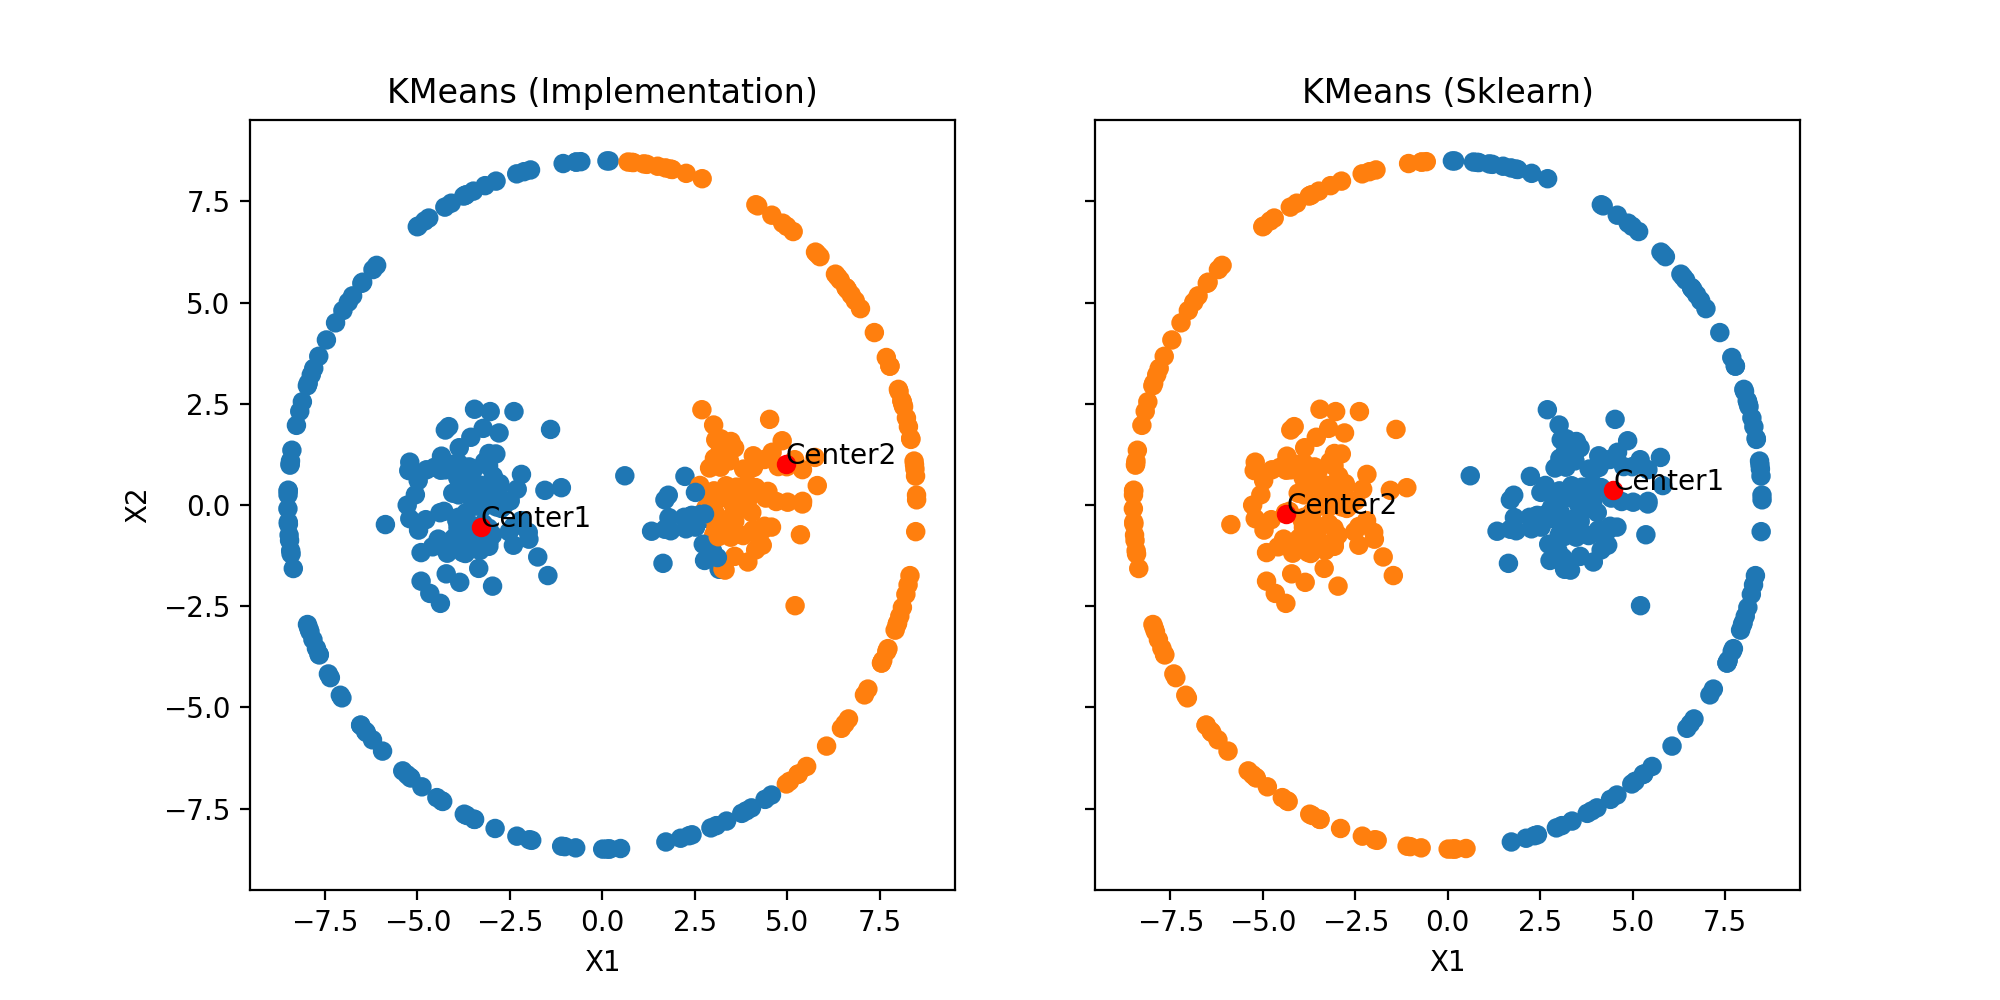

In [69]:
k = 2
cluster_assignments, centers = KMeans(X,k)

f, (ax1,ax2) = plt.subplots(1, 2, figsize = (10,5), sharex=True, sharey=True)

color = ["C" + str(c-1) for c in cluster_assignments]
ax1.scatter(X[:,0], X[:,1], c = color)
ax1.scatter(centers[:,0], centers[:,1], color = 'red')
for i,center in enumerate(centers):
      ax1.annotate("Center" + str(i+1), (center[0],center[1]))

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_title("KMeans (Implementation)")       
        
skkmeans = cluster.KMeans(n_clusters=k)
skkmeans.fit(X)

labels = skkmeans.labels_
sk_centers = skkmeans.cluster_centers_
color = ["C" + str(c) for c in labels]
ax2.scatter(X[:,0], X[:,1], c = color)
ax2.scatter(sk_centers[:,0], sk_centers[:,1], color = 'red')
for i,center in enumerate(sk_centers):
      ax2.annotate("Center" + str(i+1), (center[0],center[1]))

ax2.set_xlabel("X1")
#ax2.set_ylabel("X2")
ax2.set_title("KMeans (Sklearn)")               
plt.show()

<IPython.core.display.Javascript object>


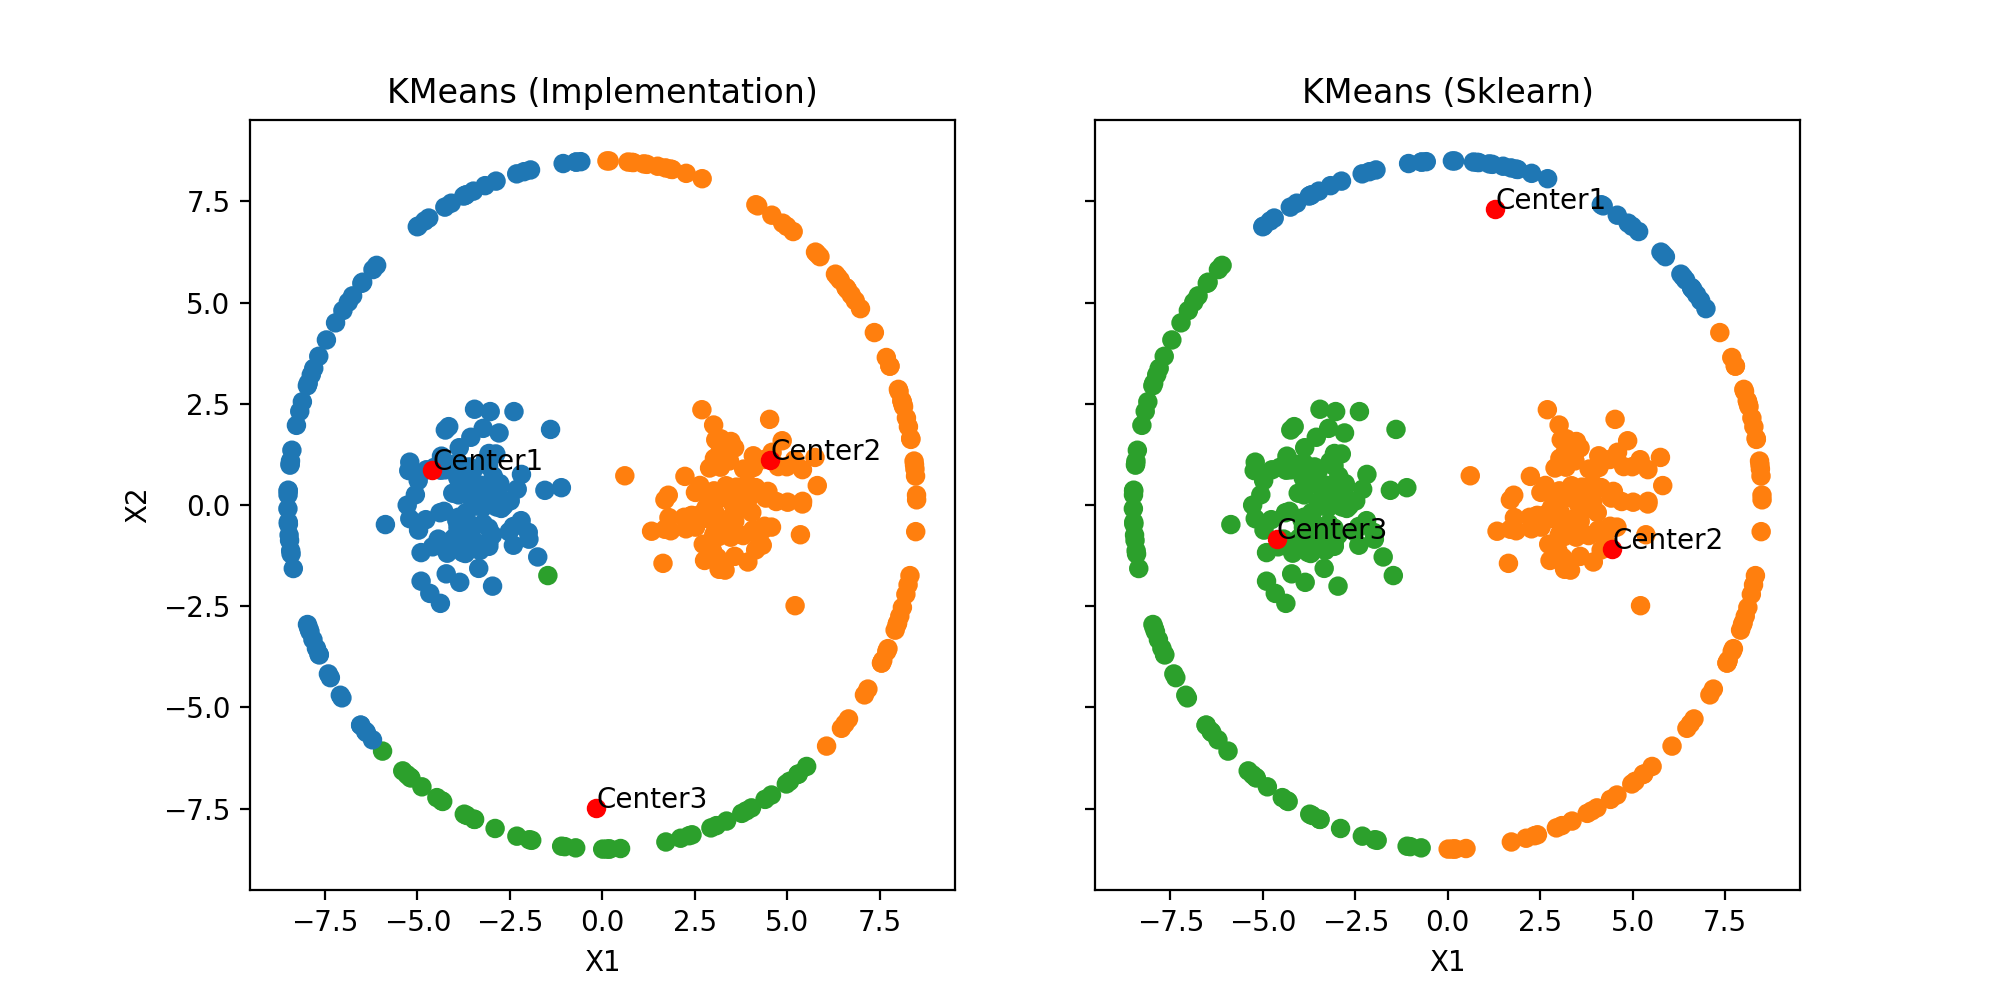

In [70]:
k = 3
cluster_assignments, centers = KMeans(X,k)

f, (ax1,ax2) = plt.subplots(1, 2, figsize = (10,5), sharex=True, sharey=True)

color = ["C" + str(c-1) for c in cluster_assignments]
ax1.scatter(X[:,0], X[:,1], c = color)
ax1.scatter(centers[:,0], centers[:,1], color = 'red')
for i,center in enumerate(centers):
      ax1.annotate("Center" + str(i+1), (center[0],center[1]))

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_title("KMeans (Implementation)")       
        
skkmeans = cluster.KMeans(n_clusters=k)
skkmeans.fit(X)

labels = skkmeans.labels_
sk_centers = skkmeans.cluster_centers_
color = ["C" + str(c) for c in labels]
ax2.scatter(X[:,0], X[:,1], c = color)
ax2.scatter(sk_centers[:,0], sk_centers[:,1], color = 'red')
for i,center in enumerate(sk_centers):
      ax2.annotate("Center" + str(i+1), (center[0],center[1]))

ax2.set_xlabel("X1")
#ax2.set_ylabel("X2")
ax2.set_title("KMeans (Sklearn)")               
plt.show()

<IPython.core.display.Javascript object>


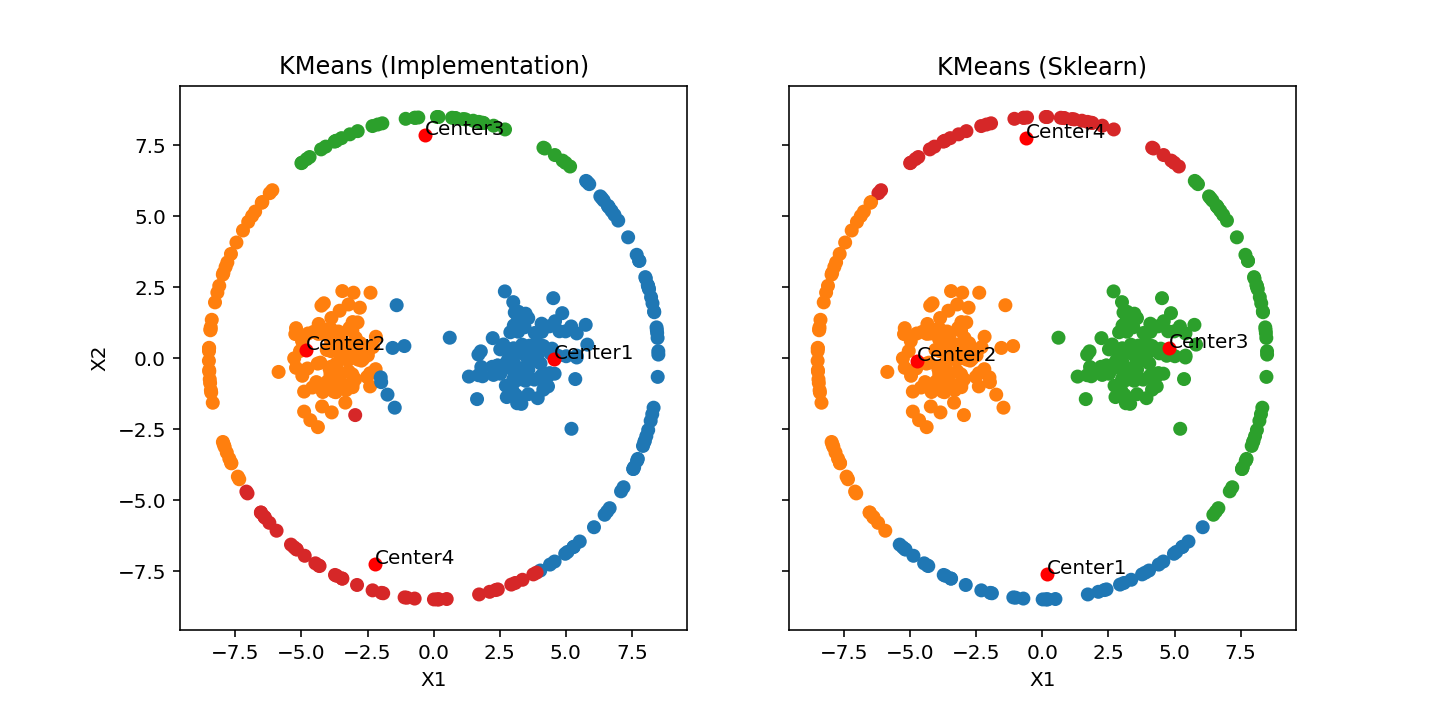

In [87]:
k = 4
cluster_assignments, centers = KMeans(X,k)

f, (ax1,ax2) = plt.subplots(1, 2, figsize = (10,5), sharex=True, sharey=True)

color = ["C" + str(c-1) for c in cluster_assignments]
ax1.scatter(X[:,0], X[:,1], c = color)
ax1.scatter(centers[:,0], centers[:,1], color = 'red')
for i,center in enumerate(centers):
      ax1.annotate("Center" + str(i+1), (center[0],center[1]))

ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_title("KMeans (Implementation)")       
        
skkmeans = cluster.KMeans(n_clusters=k)
skkmeans.fit(X)

labels = skkmeans.labels_
sk_centers = skkmeans.cluster_centers_
color = ["C" + str(c) for c in labels]
ax2.scatter(X[:,0], X[:,1], c = color)
ax2.scatter(sk_centers[:,0], sk_centers[:,1], color = 'red')
for i,center in enumerate(sk_centers):
      ax2.annotate("Center" + str(i+1), (center[0],center[1]))

ax2.set_xlabel("X1")
#ax2.set_ylabel("X2")
ax2.set_title("KMeans (Sklearn)")               
plt.show()

### b)

### c)

In [82]:
def generateKNNgraph(X,k):
    n,d = X.shape
    
    distances = euclidean_distances(X)
    k_nearest_indices = np.argsort(distances,axis = 1)[:,1:(k+1)]
    W = np.zeros(distances.shape)
    #W[np.arange(n)[:,None], k_nearest_indices] = 1
    
    for i, index in enumerate(k_nearest_indices):
        W[i,index] = 1
        W[index,i] = 1
    
    return W

In [83]:
def spectralClustering(knnW, k, normalized):
    n = len(knnW)
    degrees = np.sum(knnW,axis = 1)
    
    degree_matrix = np.zeros(knnW.shape)
    np.fill_diagonal(degree_matrix,degrees)
    
    if normalized:
        reci_sqrt_degree_matrix = np.zeros(knnW.shape)
        
        np.fill_diagonal(reci_sqrt_degree_matrix,degrees**(-1/2))
       
        laplacian = reci_sqrt_degree_matrix @ (degree_matrix - knnW) @ reci_sqrt_degree_matrix
 
        eigen_values, eigen_vectors = eig(laplacian)
        
        k_smallest_vectors = eigen_vectors[:,np.argsort(eigen_values)[:k]]    
        
        Y = reci_sqrt_degree_matrix @ k_smallest_vectors

    
    else:
        laplacian = degree_matrix - knnW
        
        eigen_values, eigen_vectors = eig(laplacian)
        
        Y = eigen_vectors[:,np.argsort(eigen_values)[:k]]    
        
        

    
    #skkmeans = cluster.KMeans(n_clusters=k)
    #skkmeans.fit(Y)

    #cluster_assignments = skkmeans.labels_ + 1
    #centers = skkmeans.cluster_centers_
    cluster_assignments, centers = KMeans(Y,k)
    
    return centers, cluster_assignments, Y


In [157]:
k = 3

knnW =  generateKNNgraph(X,20)
norm_centers, norm_cluster_assignments, norm_Y = spectralClustering(knnW, k,True)
unnorm_centers, unnorm_cluster_assignments, unnorm_Y = spectralClustering(knnW, k,False)

spec = cluster.SpectralClustering(k,affinity="precomputed")
spec.fit(knnW)
labels = spec.labels_

/Users/paule/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/Users/paule/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/Users/paule/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/Users/paule/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/paule/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part


### Unnormalized spectral clustering

<IPython.core.display.Javascript object>


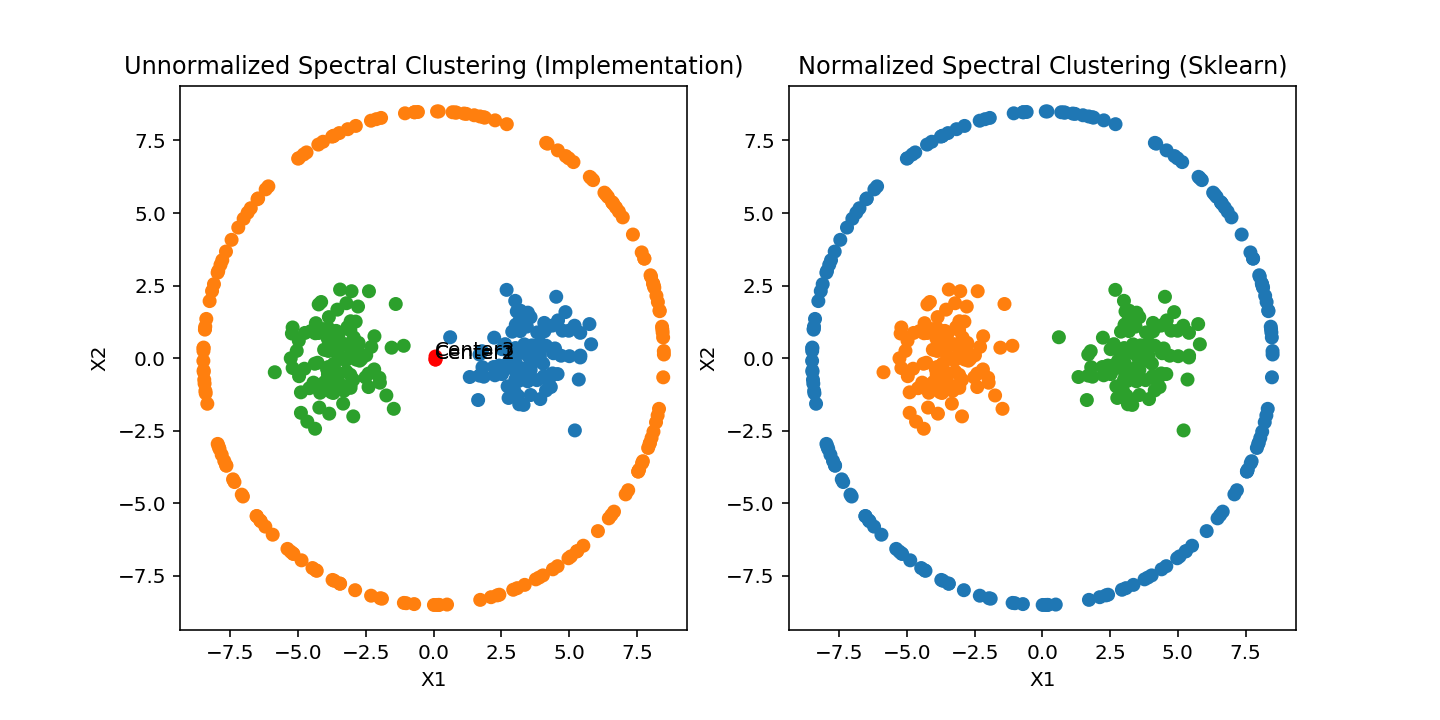

In [158]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize = (10,5))

unnorm_color = ["C" + str(c-1) for c in unnorm_cluster_assignments]

ax1.scatter(X[:,0], X[:,1], c = unnorm_color)
ax1.scatter(unnorm_centers[:,0], unnorm_centers[:,1], color = 'red')
for i,center in enumerate(unnorm_centers):
    ax1.annotate("Center" + str(i+1), (center[0],center[1]))


        
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_title("Unnormalized Spectral Clustering (Implementation)")       
         
color = ["C" + str(c) for c in labels]
ax2.scatter(X[:,0], X[:,1], c = color)

ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title("Normalized Spectral Clustering (Sklearn)")               
plt.show()

### Unnormalized spectral clustering

<IPython.core.display.Javascript object>


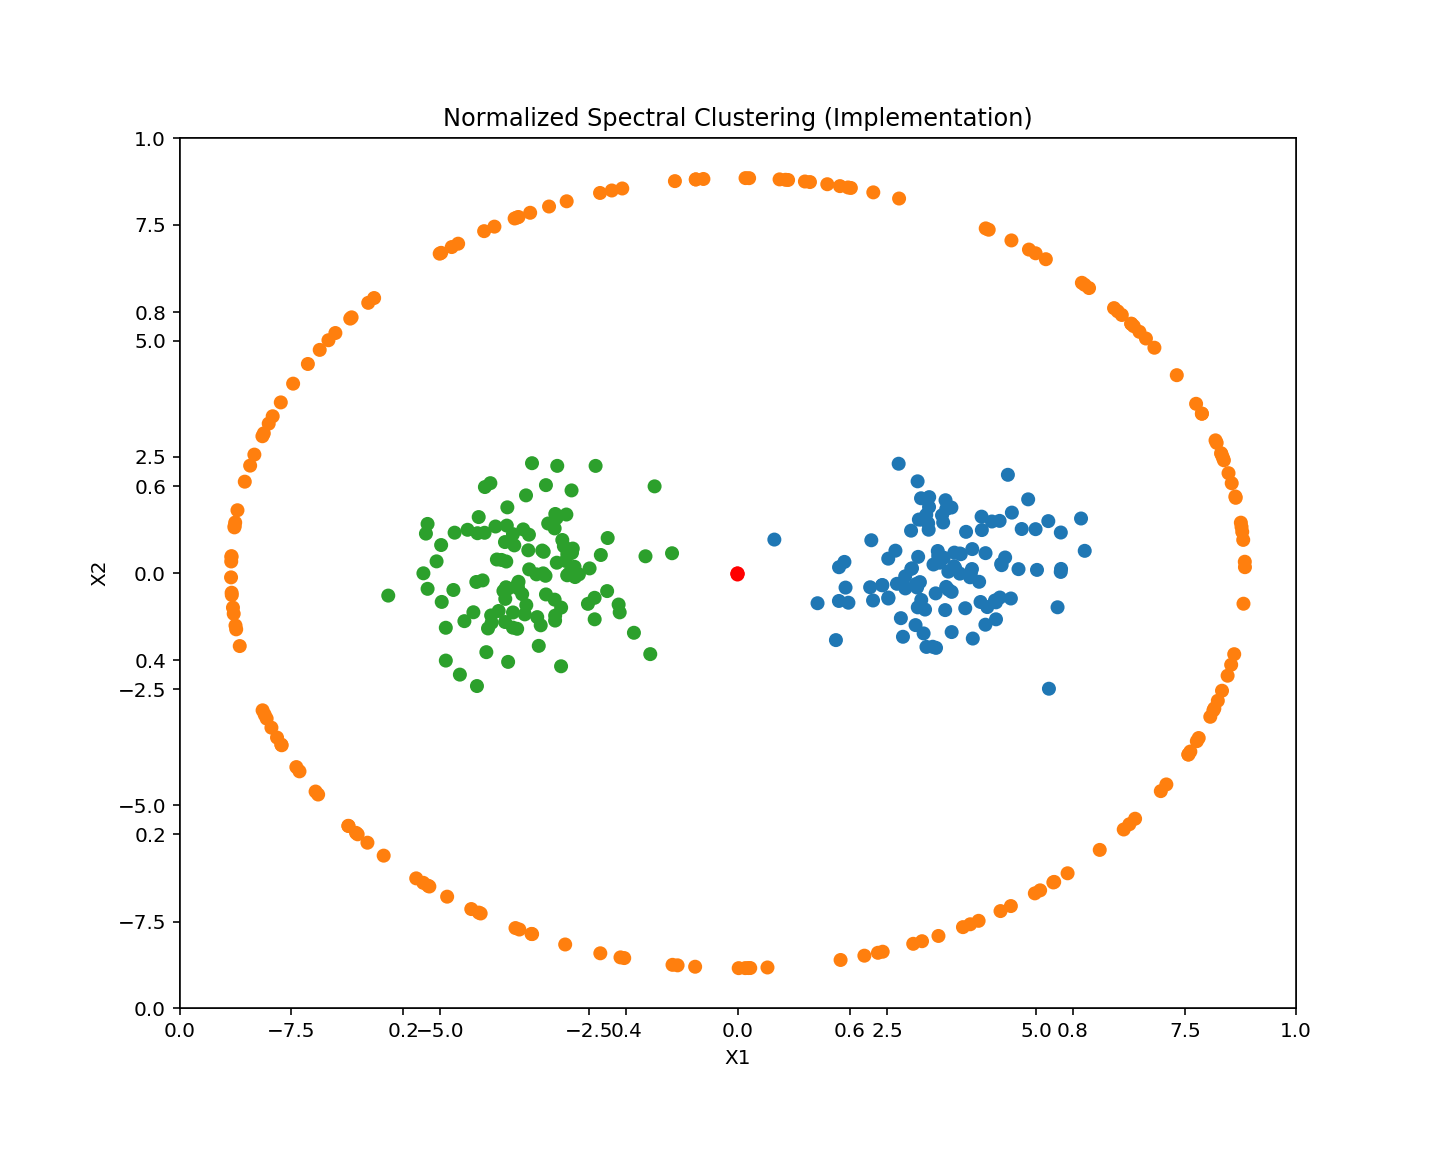

Text(0.5,1,'Normalized Spectral Clustering (Implementation)')

In [153]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)
norm_color = ["C" + str(c-1) for c in norm_cluster_assignments]

ax.scatter(X[:,0], X[:,1], c = norm_color)
ax.scatter(norm_centers[:,0], norm_centers[:,1], color = 'red')
for i,center in enumerate(norm_centers):
      ax1.annotate("Center" + str(i+1), (center[0],center[1]))


        
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Normalized Spectral Clustering (Implementation)")       

<IPython.core.display.Javascript object>


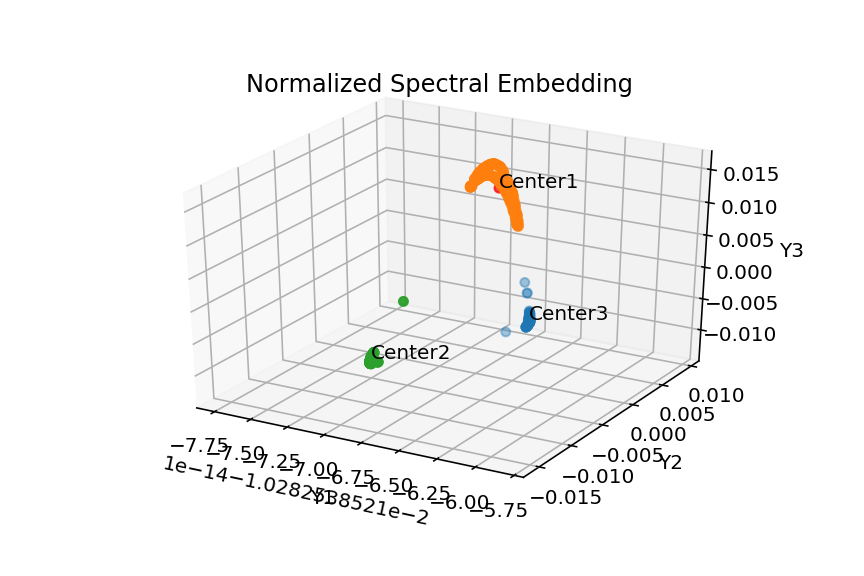

In [161]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(norm_Y[:,0], norm_Y[:,1], norm_Y[:,2],c = norm_color)
ax.scatter(norm_centers[:,0], norm_centers[:,1], norm_centers[:,2],color = 'red')
for i,center in enumerate(norm_centers):
    ax.text(center[0],center[1],center[2], "Center" + str(i+1))



ax.set_xlabel("Y1")
ax.set_ylabel("Y2")
ax.set_zlabel("Y3")
ax.set_title("Normalized Spectral Embedding ")               
plt.show()